# Python Answer 8

In [1]:
import numpy as np
import pandas as pd
# reading the data from result of answer 5 solution
data = pd.read_csv('data.csv', parse_dates=['airdate'])
data.head()

,id,url,name,season,number,type,airdate,airtime,runtime,summary,average_rating,medium_image,original_image
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,09:00 PM,68,A woman named Dolores is a free spirit in the ...,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,09:00 PM,60,Bernard suspects that someone is sabotaging th...,7.7,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,09:00 PM,60,Bernard continues to investigate Dolores' supp...,7.6,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,09:00 PM,60,While Dolores joins William and Logan on their...,7.9,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,09:00 PM,60,Dolores takes the first step on her path of di...,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


### Overall ratings for each seasons.

In [2]:
data.groupby('season')['average_rating'].median()

season
1    8.00
2    7.85
3    7.80
4    7.55
Name: average_rating, dtype: float64

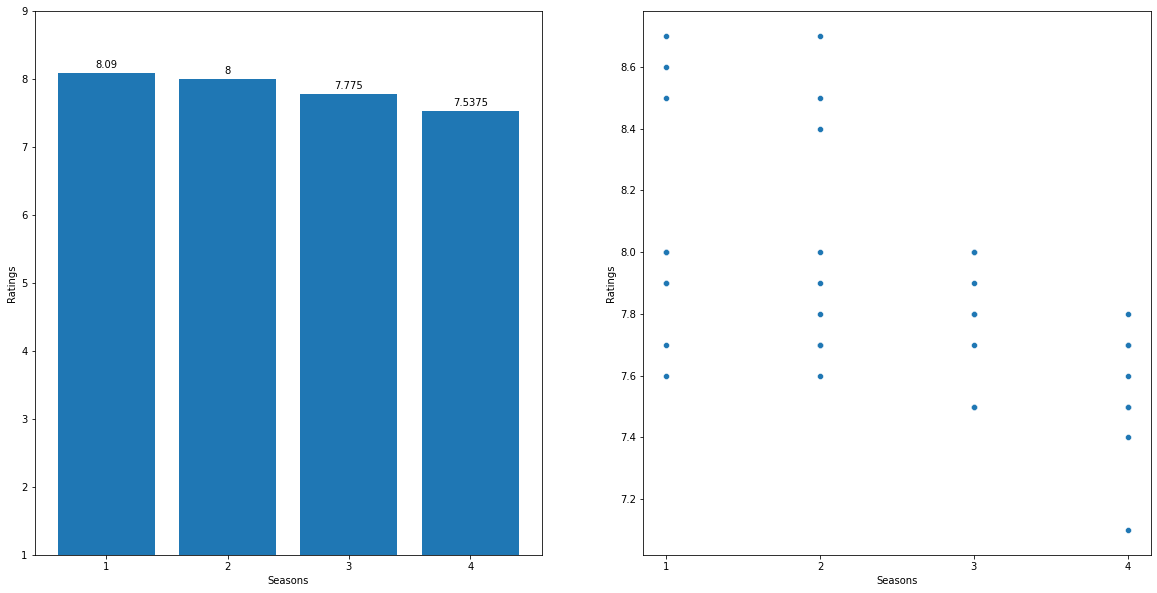

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
# grouping the data by season and selecting average_rating's mean
grouped = data.groupby('season')['average_rating'].mean()
# creating figure and axes
fig, (ax_1, ax_2) = plt.subplots(1, 2, figsize=(20, 10))
# plotting the grouped data
rect = ax_1.bar(grouped.index, grouped.values)
# putting the value of rating above bar
ax_1.bar_label(rect, padding=3)
# changing the limit of y to 1 to 9
ax_1.set_ylim(1, 9)
ax_1.set_xticks(grouped.index)
ax_1.set_ylabel('Ratings')
ax_1.set_xlabel('Seasons')
# scatter plotting the season and average_rating
sns.scatterplot(data=data, x='season', y='average_rating', ax=ax_2)
ax_2.set_xlabel('Seasons')
ax_2.set_ylabel('Ratings')
ax_2.set_xticks([1, 2, 3, 4])
plt.show()

### Episodes whose average rating is more than 8.

In [4]:
data[data.average_rating > 8].name

6                 Trompe L'Oeil
8     The Well-Tempered Clavier
9            The Bicameral Mind
17                      Kiksuya
18              Vanishing Point
19                The Passenger
Name: name, dtype: object

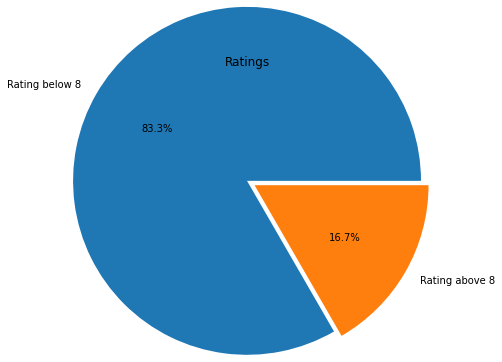

In [5]:
import matplotlib.pyplot as plt

# rating that above 8
ratings = data.average_rating > 8


labels = 'Rating below 8', 'Rating above 8'
# size of rating below 8 and rating above 8
sizes = [len(ratings)- ratings.sum(), ratings.sum()]
# creating figure and axes
fig, ax = plt.subplots()
# setting the title of plot
ax.set_title('Ratings')
# ploting a pie
ax.pie(
    x=sizes, 
    labels=labels,
    radius=2,
    autopct='%1.1f%%',
    explode=[0, 0.1])

plt.show()

### Episodes names that aired before May 2019.

In [6]:
data[data.airdate < pd.to_datetime('2019-05')].name

0                  The Original
1                      Chestnut
2                     The Stray
3             Dissonance Theory
4                   Contrapasso
5                 The Adversary
6                 Trompe L'Oeil
7                   Trace Decay
8     The Well-Tempered Clavier
9            The Bicameral Mind
10           Journey Into Night
11                      Reunion
12              Virtù e Fortuna
13     The Riddle of the Sphinx
14                 Akane No Mai
15                  Phase Space
16                 Les Écorchés
17                      Kiksuya
18              Vanishing Point
19                The Passenger
Name: name, dtype: object

Plotting the all episodes airdate

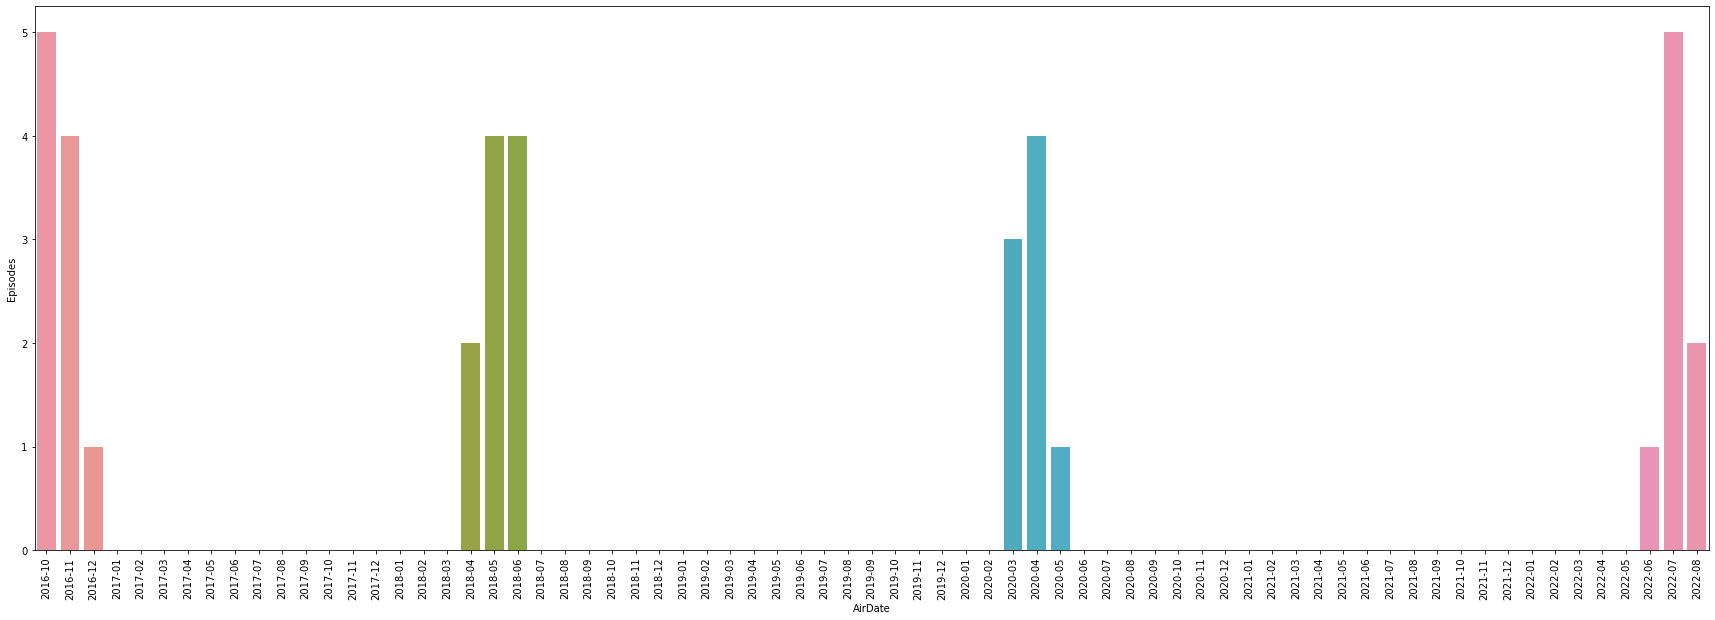

In [7]:
# creating figure and axes
fig, ax = plt.subplots(figsize=(30, 10))
# generating dates from 2016-05 to 2022-08
dates = pd.date_range('2016-10', '2022-08').strftime('%Y-%m')
# Counting the episodes by dataes
episodes_count = data.airdate.dt.strftime('%Y-%m').value_counts()
episodes = dates.map(episodes_count).fillna(0)
# plotting the data
sns.barplot(x=dates, y=episodes, ax=ax)
ax.set_ylabel('Episodes')
ax.set_xlabel('AirDate')
# rotating the xticks to 90 degree
plt.xticks(rotation=90)
plt.show()

### The episode name from each season with the highest and lowest rating

In [8]:
# grouping the data by season then aggerating max and min rating
season_min_max = data.groupby('season')[['name', 'average_rating']].agg(('max', 'min'))
season_min_max

name                average_rating     
                    max            min            max  min
season                                                    
1         Trompe L'Oeil       Chestnut            8.7  7.6
2       Virtù e Fortuna   Akane No Mai            8.7  7.6
3       The Winter Line  Crisis Theory            8.0  7.5
4              Zhuangzi  Années Folles            7.8  7.1

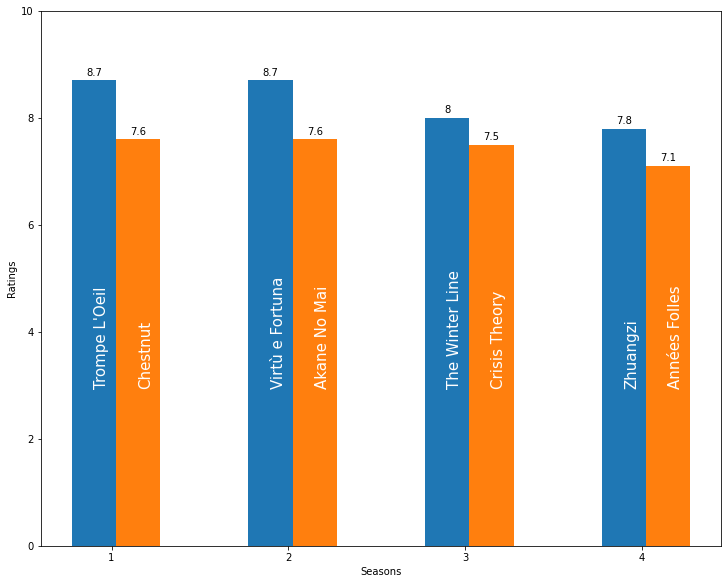

In [9]:
width = 0.25
multiplier = 0
x = np.arange(season_min_max.shape[0])

# creating figure and axex
fig, ax = plt.subplots(layout='constrained', figsize=(10, 8))
# plotting the bar graph
for ratings in season_min_max['average_rating'].values.T:
     offset = width * multiplier
     rect = ax.bar(x + offset, ratings, width)
     # putting the actual value above bar
     ax.bar_label(rect, padding=3)
     multiplier += 1

# putting names of episodes on each bar
i=0
for Max, Min in season_min_max['name'].values:
     ax.text(i, 3, Max, color='white', fontsize=15, rotation='vertical')
     ax.text(i + width, 3, Min, color='white', fontsize=15, rotation='vertical')
     i += 1
# offset the xticks
ax.set_xticks(x+.1, season_min_max.index)
ax.set_ylim(0, 10)
ax.set_xlabel('Seasons')
ax.set_ylabel('Ratings')
plt.show()

### Summary for the most popular by ratings episodes in every season.

In [10]:
# grouping the data by season and selecting summary which has highest rating
data.groupby('season')[['summary', 'average_rating']].max()

,summary,average_rating
season,,
1,While William and Dolores travel to the unclai...,8.7
2,William pays his recuperating father-in-law se...,8.7
3,Time to face the music. Dolores' true intentio...,8.0
4,You want to have a drink at a time like this?,7.8
